# **Deep Learning Project**
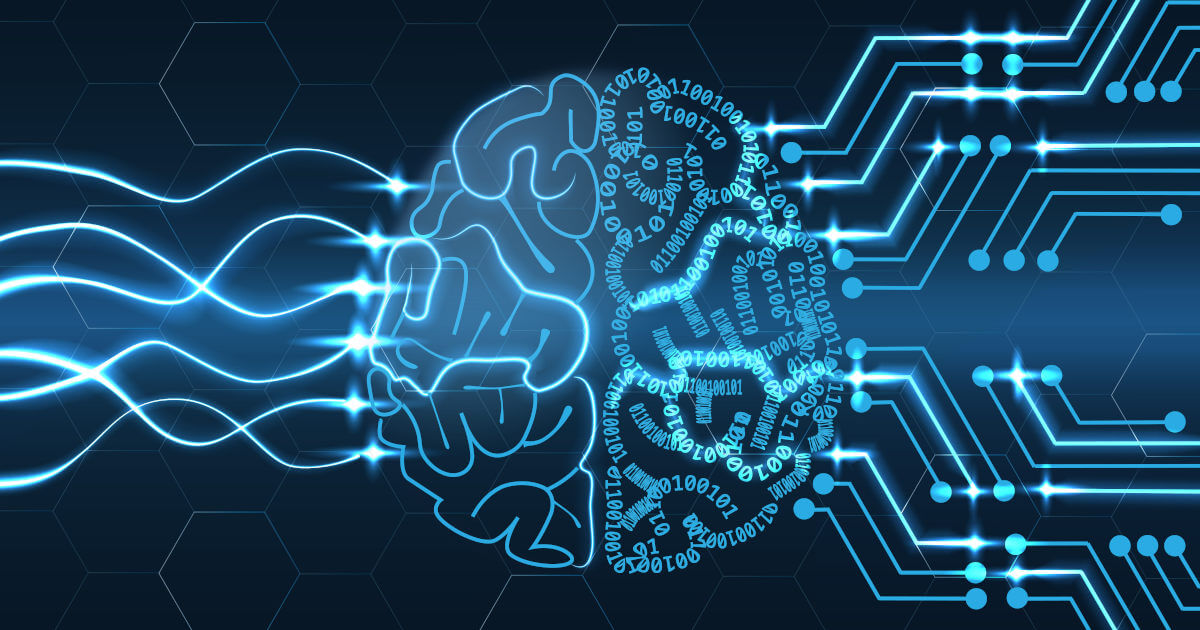

## **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # plotting graphs
import seaborn as sns   # ploting graghs

import warnings   # ignore warnings
warnings.filterwarnings('ignore')

import requests
import html5lib
from bs4 import BeautifulSoup   # web Scrapping

from keras.models import Sequential   # initilizing the ann model
from keras.layers import Dense   # creating hidden layers
from keras.wrappers.scikit_learn import KerasClassifier   # converting to classifier
from keras.utils import np_utils   # one hot encoding

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report   # accuracy, recall, presion and f1 score

from tensorflow.keras.callbacks import EarlyStopping   # to stop early ephocs
from tensorflow.keras.layers import Dropout   # reduce hidden layers

## **LOADING DATASET**

In [2]:
df = pd.read_csv('diseases.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


## **VISUALIZING THE DATASET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,0.021967,0.389158,0.043934,0.021967,0.392785,0.023176,0.023176,0.023176,0.046352,0.092705,0.046352,0.092705,0.021967,0.023176,0.114672,0.276904,0.021967,0.091495,0.137848,0.021967,0.045143,0.230552,0.185409,0.115881,0.232971,0.234180,0.024385,0.046352,0.046352,0.209794,...,0.023176,0.023176,0.023176,0.047561,0.096332,0.096332,0.023176,0.047763,0.023176,0.048771,0.021967,0.021967,0.024385,0.024385,0.046554,0.023176,0.024385,0.023176,0.023176,0.024385,0.024385,0.024385,0.024385,0.023176,0.023176,0.023176,0.024385,0.023176,0.024385,0.046352,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,0.146590,0.487608,0.204969,0.146590,0.488419,0.150478,0.150478,0.150478,0.210268,0.290047,0.210268,0.290047,0.146590,0.150478,0.318657,0.447514,0.146590,0.288341,0.344775,0.146590,0.207639,0.421229,0.388668,0.320114,0.422766,0.423528,0.154258,0.210268,0.210268,0.407203,...,0.150478,0.150478,0.150478,0.212858,0.295076,0.295076,0.150478,0.213286,0.150478,0.215410,0.146590,0.146590,0.154258,0.154258,0.210702,0.150478,0.154258,0.150478,0.150478,0.154258,0.154258,0.154258,0.154258,0.150478,0.150478,0.150478,0.154258,0.150478,0.154258,0.210268,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

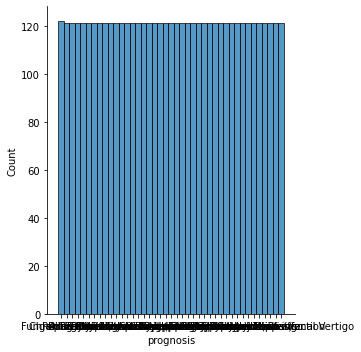

In [6]:
sns.displot(df['prognosis'])

In [ ]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df)
# plt.show()

In [ ]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot=True, cmap='Blues')
# plt.show()

## **PROCESSING DATASET**

Maximum Symptoms : 17
Minimum Symptoms : 3




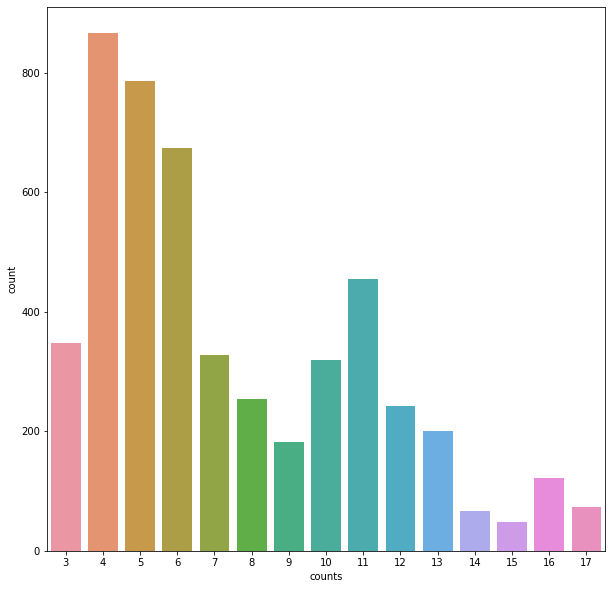

In [7]:
df['counts'] = df.sum(axis=1)
value = df['counts'].unique()
print(f'Maximum Symptoms : {max(value)}')
print(f'Minimum Symptoms : {min(value)}')
print('\n')

plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='counts')
plt.show()

In [8]:
# list of all symptoms
symptoms = []

col_names = df.iloc[:, :-2]

for symptom in col_names.columns:
    symptoms.append(symptom)

print(f'Total Symptoms : {len(symptoms)}')

Total Symptoms : 132


In [9]:
# list of all diseases
diseases = []

dis_name = df['prognosis']

for disease in dis_name.unique():
    diseases.append(disease)

print(f'Total Diseases : {len(diseases)}')

Total Diseases : 41


## **SEPEARTING X and Y**

In [10]:
X = df.iloc[:, :-2]
y = df.iloc[:, -2:-1]

In [11]:
# converting categorical data to numeric
le = LabelEncoder()
y = le.fit_transform(y)
y = np_utils.to_categorical(y)

In [12]:
# feature scaling 
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
# spliting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **ARTFICIAL NEURAL NETWORK**

In [43]:
# initilizing the ann model
ann = Sequential()

In [44]:
# adding hidden layers
ann.add(Dense(units=50, activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=40, activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=10, activation='relu'))
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dropout(rate=0.2))

In [45]:
# adding output layer
ann.add(Dense(units=41, activation='softmax')) 

In [46]:
# establising the connection
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [47]:
# stopping early according to accuracy
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [48]:
# fitting the model
ann.fit(X_train, y_train, batch_size=50, epochs=500, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/500
70/70 [==============================] - 1s 6ms/step - loss: 3.6634 - accuracy: 0.0282 - val_loss: 3.4745 - val_accuracy: 0.0578
Epoch 2/500
70/70 [==============================] - 0s 4ms/step - loss: 3.4624 - accuracy: 0.0541 - val_loss: 3.1495 - val_accuracy: 0.1028
Epoch 3/500
70/70 [==============================] - 0s 3ms/step - loss: 3.2623 - accuracy: 0.0769 - val_loss: 2.8589 - val_accuracy: 0.2263
Epoch 4/500
70/70 [==============================] - 0s 3ms/step - loss: 3.1011 - accuracy: 0.1060 - val_loss: 2.6340 - val_accuracy: 0.2310
Epoch 5/500
70/70 [==============================] - 0s 4ms/step - loss: 2.9824 - accuracy: 0.1189 - val_loss: 2.5066 - val_accuracy: 0.2713
Epoch 6/500
70/70 [==============================] - 0s 3ms/step - loss: 2.8966 - accuracy: 0.1394 - val_loss: 2.3945 - val_accuracy: 0.2680
Epoch 7/500
70/70 [==============================] - 0s 4ms/step - loss: 2.8101 - accuracy: 0.1480 - val_loss: 2.2856 - val_accuracy: 0.2552
Epoch 8/500
7

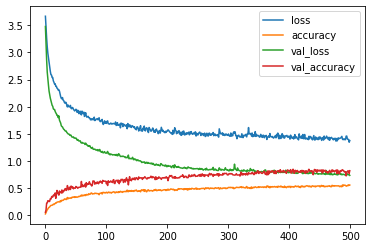

In [49]:
# loss function
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [50]:
# predicting
y_pred = ann.predict(X_test)

## **ACCURACY RATE**

In [51]:
length = len(y_pred)

ytestlabel = np.argmax(y_test, axis=1) #actual
ypredlabel = np.argmax(y_pred, axis=1) #pred

ac = (sum(ytestlabel == ypredlabel) / length) * 100

print(f'Accuracy : {round(ac, 2)} %')

Accuracy : 82.27 %


In [52]:
def mymodel():
    ann = Sequential()
    ann.add(Dense(units=50, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=40, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=30, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=20, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=10, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=5, activation='relu'))
    ann.add(Dropout(rate=0.2))
    ann.add(Dense(units=41, activation='softmax')) 
    ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    return ann

In [54]:
mlmodel = KerasClassifier(build_fn=mymodel, epochs=500, batch_size=50, verbose=0)
kf = KFold(n_splits=10, shuffle=True)
cvs = cross_val_score(mlmodel, X, y, cv = kf)
print(f'Average Accuracy : {cvs.mean()*100} \n Stanadard Deviation : {cvs.std()}')

Average Accuracy : 88.8173395395279 
 Stanadard Deviation : 0.0703239987423423


## **DISEASE PREDICTION**

In [70]:
class Disease:

    ans = []
    val = []

    def __init__(self):
        self.answer()

    def answer(self):

        for i in range(len(symptoms)):
            self.ans.append(0)

        self.value()

        for i in range(len(symptoms)):
            for j in self.val:
                if (j == symptoms[i]):
                    self.ans[i] = 1

    def value(self):
        for i in range(len(symptoms)):
            n_inputs = input('Enter the Symptoms : ')

            if (n_inputs.lower() == 'done'):
                break
            else:
                self.val.append(n_inputs.lower())

    def diseases(self):
        new_val = [self.ans]
        new_val = sc.transform(new_val)
        new_pred = ann.predict(new_val)

        predicted_value = new_pred[0]
        maximum = max(predicted_value)
        id = np.argmax(predicted_value)

        # print(f'Value : {new_pred[0]}')
        # print(f'Maximum Value : {maximum}')
        # print(f'ID of Maximum Value : {id}')
        # print(f'You are suffering from : {diseases[id]}')
        prt = f'You are suffering from : {diseases[id]}'
        return prt

    def __str__(self):
        return str(self.diseases())


In [71]:
model = Disease()

Enter the Symptoms : continuous_sneezing
Enter the Symptoms : chills
Enter the Symptoms : fatigue
Enter the Symptoms : irregular_sugar_level
Enter the Symptoms : cough
Enter the Symptoms : headache
Enter the Symptoms : swelled_lymph_nodes
Enter the Symptoms : malaise
Enter the Symptoms : phlegm
Enter the Symptoms : throat_irritation
Enter the Symptoms : redness_of_eyes
Enter the Symptoms : sinus_pressure
Enter the Symptoms : runny_nose
Enter the Symptoms : congestion
Enter the Symptoms : chest_pain
Enter the Symptoms : loss_of_smell
Enter the Symptoms : done


In [72]:
print(model)

You are suffering from : Hypertension 


## **HELP**

In [61]:
import pickle

In [62]:
my_var = {
    'df': df,
    'value': value,
    'symptoms': symptoms,
    'diseases': diseases,
    'sc': sc,
    'ann': ann,
    'ac': ac,
    'cvs': cvs
}

In [63]:
file = open("data.pkl", "wb")
pickle.dump(my_var, file)
file.close()

INFO:tensorflow:Assets written to: ram://f16f5f73-9670-42ea-a787-8fce5d9115cf/assets


In [64]:
with open('data.pkl', 'rb') as pickled:
    data = pickle.load(pickled)

In [65]:
data['diseases']

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

In [66]:
from google.colab import files
files.download('data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
ann.save('models.h5')